# Exit Survey Analysis

Organizations would typically want to understand why its employees resign. This information is usually gathered by using exit surveys that resigning employees are asked to take.

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

Data sources:
* [TAFE exit survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

* [DETE survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)


Our main questions in this analysis are:

-> Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

-> Are younger employees resigning due to some kind of dissatisfaction? What about older employees?




In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#load in the datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')




In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.shape

(822, 56)

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Some observations about the DETE survey:

* dete_survey has mostly string columns, followed by boolean values, and just 1 integer column, the ID column

* dete_survey seems to quite a few missing values. striking are the 'aboriginal', 'torres strait', 'south sea', 'disability' and 'NESB' columns, which mostly contain null values

* there are values that are 'not stated'. these could actually be treated as null values instead of strings

* there are lots of columns here that we dont need to answer our questions

* there are multiple columns that indicate disatisfaction

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.shape

(702, 72)

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Some observations about the TAFE dataset: 

* tafe_survey only has 2 float columns with the rest of its columns being string columns

* similarly, tafe_survey also has a lot of missing values but the column with the most number of missing values still has a lot more non-null values than the mostly null columns in dete_survey

* there are lots of columns here that we dont need to answer our questions

* there are multiple columns that indicate disatisfaction

In [7]:
#convert 'not stated' to nulls when read in
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#remove unrelated cols in dete_survey (??)
dropcol_dete = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dropcol_dete, axis=1)

#remove unrelated cols in tafe_survey (positive sentiments)
dropcol_tafe = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(dropcol_tafe, axis = 1)

In [8]:
newdetecols = dete_survey_updated.columns
newdetecols

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
#make all colnames lowercase, no trailing whitespace, and turn all other
#whitespaces into _
newdetecols = dete_survey_updated.columns
newdetecols = (newdetecols.str.lower().str.strip()
                 .str.replace(' ', '_'))

dete_survey_updated.columns = newdetecols

In [10]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
#update colnames in tafe_survey_updated to make it cleaner

mapping = {'Record ID': 'id',
           'CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender': 'gender',
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'postition',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_'
          }

tafe_survey_updated = tafe_survey_updated.rename(columns=mapping)

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [21]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,postition,institute_service,role_
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


At this point, we have renamed columns to follow the same format (no trailing whitespaces, _ instead of spaces, converted to lowercase). Also, we changed some names in the tafe_survey_updated dataset to set up easier concatenating later

In both datasets, we can spot the observations that have something to do with resignation through the 'separationtype' column, which lists the reasons why a given observation left their institute.

Let's now have a look at the reasons employees leave for both surveys:

In [22]:
dete_survey_updated['separationtype'].value_counts()


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [23]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We can see that the reasons for leaving is not just due resignations. Let's filter out those not related to resignations

In [24]:
#get only resignation-related rows from dete
resiglist = ['Resignation-Other reasons',
             'Resignation-Other employer',
             'Resignation-Move overseas/interstate'
             ]
dete_resignations = (dete_survey_updated[dete_survey_updated['separationtype']
                                        .isin(resiglist)])

#note that df.isin is how you index a df using a list 
#of possible matches


In [25]:
#get only resignation-related rows from tafe

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

tafe_resignations

#we index this df normally, with just one match (vs. a list above)


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,postition,institute_service,role_
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


Let's check the year tally for resignations 

In [28]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

There's some cleaning to be done with these values to turn them into proper year values. For this, we will use the extract function with RegEx to get the year values from each string value.

In [31]:
dete_resignations['cease_date'].value_counts()

detepat = r"(?P<Year>[1-2][0-9]{3})"

cease2 = dete_resignations['cease_date'].str.extract(detepat)
cease2 = cease2.astype(float)

dete_resignations['cease2'] = cease2


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Let's now get the year tally again

In [33]:
dete_resignations['cease2'].value_counts(ascending=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease2, dtype: int64

In [34]:
#sanitycheck if it's extracting what it's supposed to
dete_resignations[['cease2', 'cease_date']]

,cease2,cease_date
3,2012.0,05/2012
5,2012.0,05/2012
8,2012.0,07/2012
9,2012.0,2012
11,2012.0,2012
12,2012.0,2012
14,2012.0,2012
16,2012.0,2012
20,2012.0,2012
21,2012.0,2012


Let's visualize this range of years with moth matplotlib and seaborn

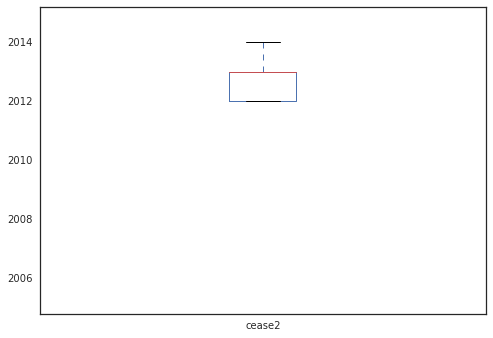

In [42]:
ax = dete_resignations['cease2'].plot(kind='box')
ax.margins(x=0, y=0.15)


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



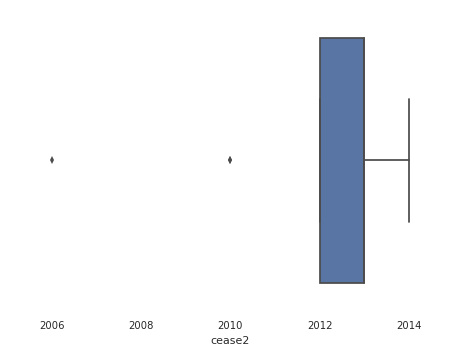

In [43]:
import seaborn as sns

sns.set(style="white")
ax = sns.boxplot(dete_resignations['cease2'])
ax.set_xlim(2005,2015)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom="off", left="off", top="off", right="off")

We'll do the same thing for the start dates in dete_resignations

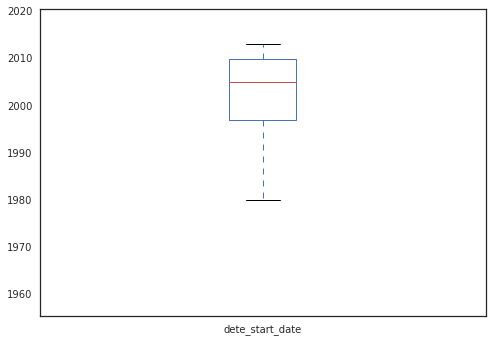

In [44]:
ax = dete_resignations['dete_start_date'].plot(kind='box')
ax.margins(x=0, y=0.15)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



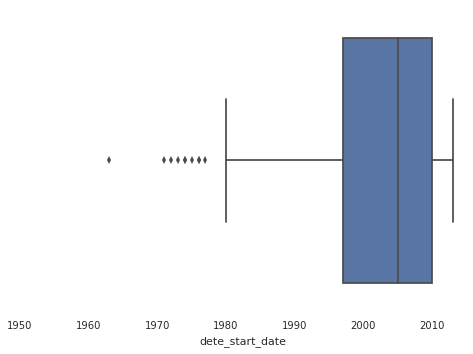

In [45]:
ax = sns.boxplot(dete_resignations['dete_start_date'])
ax.set_xlim(1950,2015)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom="off", left="off", top="off", right="off")

Let's move on to their TAFE counterparts

(2005, 2015)

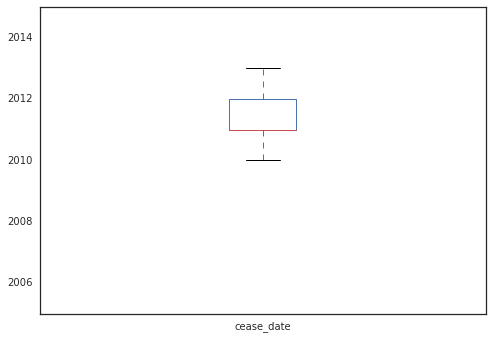

In [47]:
ax = tafe_resignations['cease_date'].plot(kind='box')
ax.set_ylim(2005, 2015)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



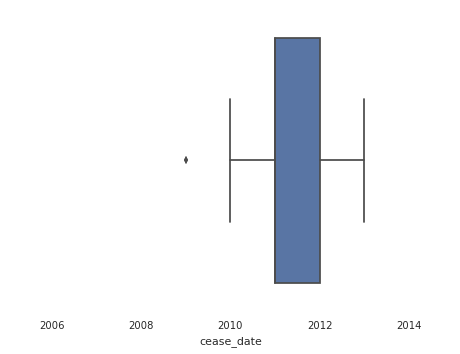

In [48]:
ax = sns.boxplot(tafe_resignations['cease_date'])
ax.set_xlim(2005,2015)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom="off", left="off", top="off", right="off")

From what we see, there are no major issues with the years in the columns we're interested in. However, the years in each column does  not seem to have the same time frame

Now we'll calculate the service period of the resigned employees from the dete_resignations.

In [50]:
newcol = (dete_resignations['cease2'] 
          - dete_resignations['dete_start_date'])

dete_resignations['institute_service'] = newcol #settingwithcopy warn


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [51]:
#check if calulation makes sense
dete_resignations[['cease2', 'dete_start_date', 'institute_service']]

,cease2,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0
12,2012.0,1998.0,14.0
14,2012.0,2007.0,5.0
16,2012.0,NaN,NaN
20,2012.0,1982.0,30.0
21,2012.0,1980.0,32.0


Next, we have to identify which employees who resigned because they were dissatisfied. From the two dataframes, we can idenfity the columns that we can use to identify these particular employees. 

TAFE 

* Contributing Factors, Dissatisfaction
* Contributing Factors, Job Dissatisfaction

DETE

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload


Due to the way the dataset is organized, we'll need to check the values across rows to see if our columns of interest are marked. If they are, then we'll consider them dissatisfied. 

First we'll check what we're working with by tallying the number of observations we expect to have "dissatisfied" value of True.

In [63]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)


True    332
NaN       8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [64]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)


True    332
NaN       8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
# sp = tafe_resignations['Contributing Factors. Job Dissatisfaction'][17]

In [38]:
# tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].str.strip()

In [39]:
# dictD= {'Contributing Factors. Dissatisfaction': 'True',
#         '-': 'False'
#         }

# dictJD= {sp: 'True',
#           '-': 'False'
#          }

# x = tafe_resignations['Contributing Factors. Dissatisfaction'].map(dictD)
# y = tafe_resignations['Contributing Factors. Job Dissatisfaction'].map(dictJD)



In [40]:
# x.value_counts(dropna=False)

In [41]:
# y.value_counts(dropna=False)

In [42]:
# tafe_resignations['Contributing Factors. Dissatisfaction'] = x
# tafe_resignations['Contributing Factors. Job Dissatisfaction'] = y

In [43]:
# tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].apply(pd.value_counts, dropna=False)

In [65]:
#function to be applied element-wise on the different columns 
#to check if they have marked it or not.
def update_vals(val):
    if pd.isnull(val):   #this is how to check if NaN
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [66]:
#apply the function on all the columns of interest
tafe_resignations['Contributing Factors. Dissatisfaction'] = \
(tafe_resignations['Contributing Factors. Dissatisfaction']
                     .apply(update_vals))

tafe_resignations['Contributing Factors. Job Dissatisfaction'] = \
(tafe_resignations['Contributing Factors. Job Dissatisfaction']
                     .apply(update_vals))


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [67]:
#for every obs, check if any of the columns of interest are True
#then return True if that condition holds, False otherwise
dete_select_disat = ['job_dissatisfaction',
                     'dissatisfaction_with_the_department',
                     'physical_work_environment',
                     'lack_of_recognition',
                     'lack_of_job_security',
                     'work_location',
                     'employment_conditions',
                     'work_life_balance',
                     'workload'
                    ]

tafe_select_disat = ['Contributing Factors. Dissatisfaction',
                     'Contributing Factors. Job Dissatisfaction'
                    ]

dete_resignations['dissatisfied'] = (dete_resignations[dete_select_disat]
                                     .any(axis=1, skipna=False))

tafe_resignations['dissatisfied'] = (tafe_resignations[tafe_select_disat]
                                     .any(axis=1, skipna=False))






/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [68]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

True    332
NaN       8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [69]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

True    332
NaN       8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [60]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()



Before we concatenate the datasets, =let's also make an 'institute' column that will indicate which dataset the observation comes from

In [70]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [71]:
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,age,aboriginal,torres_strait,south_sea,disability,nesb,cease2,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,7.0,False,DETE
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,41-45,NaN,NaN,NaN,NaN,NaN,2012.0,18.0,True,DETE
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3.0,False,DETE
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,46-50,NaN,NaN,NaN,NaN,NaN,2012.0,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3.0,False,DETE
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,14.0,False,DETE
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,5.0,True,DETE
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,61 or older,NaN,NaN,NaN,NaN,NaN,2012.0,NaN,True,DETE
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,56-60,NaN,NaN,NaN,NaN,NaN,2012.0,30.0,False,DETE
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,51-55,NaN,NaN,NaN,NaN,NaN,2012.0,32.0,False,DETE


In [72]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1998.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1982.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False


Let's check if the concatenation went as planned. The shapes should add up

In [75]:
dete_resignations_up.shape

(311, 39)

In [76]:
tafe_resignations_up.shape

(340, 25)

In [77]:
combined.shape

(651, 56)

Before proceeding, let's address the null values of this new combined dataset. Let's check for nulls

In [78]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_                                                  290
postition                                              290
Gender. What is your Gender?                           290
cease2                                                 300
gender                                                 302
position                                               308
lack_of_job_security                                   3

We can see that there are a lot of columns with null values. We can set a threshold of >500 non-nulls for a column to be retained. Although not all columns are needed for this analysis, we do this to retain a cleaner dataset with not much null values in the future.

We also see that the columns that we need do have a significant amount of non-nulls, so our analysis can proceed

In [80]:
#drop columns where non-nulls don't reach 500 obs
combined_updated = combined.dropna(axis=1, thresh=500)

In [81]:
combined_updated.shape

(651, 8)

We retained only columns with >500 non-null values. the result is a df with just 8 columns left

Now, let's turn our attention to the age column. We now want to see the rows without an age value 

In [83]:
combined_updated[combined_updated['age'].isnull()]

,age,cease_date,dissatisfied,employment_status,id,institute,institute_service,separationtype
214,NaN,2012,False,Permanent Part-time,2.150000e+02,DETE,13,Resignation-Other reasons
285,NaN,2012,False,Permanent Full-time,2.860000e+02,DETE,0,Resignation-Move overseas/interstate
405,NaN,2012,False,NaN,4.060000e+02,DETE,NaN,Resignation-Other reasons
802,NaN,12/2013,False,Permanent Part-time,8.040000e+02,DETE,NaN,Resignation-Move overseas/interstate
821,NaN,12/2013,False,NaN,8.230000e+02,DETE,NaN,Resignation-Move overseas/interstate
3,NaN,2010,True,NaN,6.341399e+17,TAFE,NaN,Resignation
16,NaN,2010,NaN,NaN,6.341770e+17,TAFE,NaN,Resignation
18,NaN,2010,NaN,NaN,6.341779e+17,TAFE,NaN,Resignation
19,NaN,2010,True,NaN,6.341820e+17,TAFE,NaN,Resignation
20,NaN,2010,True,NaN,6.341821e+17,TAFE,NaN,Resignation


Let's also check the unique values for the age and institute_service columns

In [84]:
combined_updated['age']

3            36-40
5            41-45
8            31-35
9            46-50
11           31-35
12           36-40
14           31-35
16     61 or older
20           56-60
21           51-55
22           46-50
23     61 or older
25           41-45
27           21-25
33           36-40
34     61 or older
37           21-25
39           21-25
40           56-60
41           51-55
42           41-45
43           51-55
48           21-25
50           21-25
51     61 or older
55           26-30
57           46-50
61           31-35
69           36-40
71           36-40
          ...     
659         46  50
660         41  45
661         46  50
665            NaN
666            NaN
669         26  30
670            NaN
671         46  50
675          51-55
676         41  45
677         36  40
678          51-55
679    56 or older
681         26  30
682         26  30
683         41  45
684         41  45
685         26  30
686         41  45
688         46  50
689         41  45
690         

In [85]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We see that there are different formats for the values that represent years. We need to clean this up as we place each value in a different category using a custom function

We will follow the institute_service categorization as follows:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

In [86]:
def categorize(val):
    if val in ['Less than 1 year', '1-2']:
        return 'New'
    elif val in ['3-4', '5-6']:
        return 'Experienced'
    elif val == '7-10':
        return 'Established'
    elif val in ['11-20', 'More than 20 years']:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val > 10:
        return 'Veteran'
    
      

In [87]:
#test the function
categorize('11-20')

'Veteran'

In [88]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
#test to see if our 'service_cat' column is correct
combined_updated[['service_cat', 'institute_service']]

,service_cat,institute_service
3,Established,7
5,Veteran,18
8,Experienced,3
9,Veteran,15
11,Experienced,3
12,Veteran,14
14,Experienced,5
16,NaN,NaN
20,Veteran,30
21,Veteran,32


In [90]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [91]:
#review the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

True     481
False    162
NaN        8
Name: dissatisfied, dtype: int64

We'll make a judgment on how to deal with the null values here. Since this is a boolean column and there are not a lot of null values, we will just use the mode (False) to replace the null values.

In [93]:
#all NaNs converted to False, the mode of the column
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [94]:
#check data structure
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
age                  596 non-null object
cease_date           635 non-null object
dissatisfied         651 non-null bool
employment_status    597 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
separationtype       651 non-null object
service_cat          563 non-null object
dtypes: bool(1), float64(1), object(7)
memory usage: 66.4+ KB


with the nulls taken care of, we can finally aggregate the 'dissatisfied' col (bool col: 0 or 1) on the services categories ('service_cat') that we're interested in 

In [95]:
combined_updated

,age,cease_date,dissatisfied,employment_status,id,institute,institute_service,separationtype,service_cat
3,36-40,05/2012,False,Permanent Full-time,4.000000e+00,DETE,7,Resignation-Other reasons,Established
5,41-45,05/2012,True,Permanent Full-time,6.000000e+00,DETE,18,Resignation-Other reasons,Veteran
8,31-35,07/2012,False,Permanent Full-time,9.000000e+00,DETE,3,Resignation-Other reasons,Experienced
9,46-50,2012,True,Permanent Part-time,1.000000e+01,DETE,15,Resignation-Other employer,Veteran
11,31-35,2012,False,Permanent Full-time,1.200000e+01,DETE,3,Resignation-Move overseas/interstate,Experienced
12,36-40,2012,False,Permanent Full-time,1.300000e+01,DETE,14,Resignation-Other reasons,Veteran
14,31-35,2012,True,Permanent Full-time,1.500000e+01,DETE,5,Resignation-Other employer,Experienced
16,61 or older,2012,True,Permanent Part-time,1.700000e+01,DETE,NaN,Resignation-Other reasons,NaN
20,56-60,2012,False,Permanent Full-time,2.100000e+01,DETE,30,Resignation-Other employer,Veteran
21,51-55,2012,False,Permanent Part-time,2.200000e+01,DETE,32,Resignation-Other reasons,Veteran


Now we can finally see how many of the different service categories left because of job dissatisfaction. This is one of the questions we started out with

In [97]:
#default pv aggfunc is np.mean, which is convenient since
#booleans can be averaged.
pv = combined_updated.pivot_table(values='dissatisfied', 
                             index='service_cat'
                            )

In [98]:
pv

,dissatisfied
service_cat,
Established,0.741935
Experienced,0.761628
New,0.818653
Veteran,0.676471


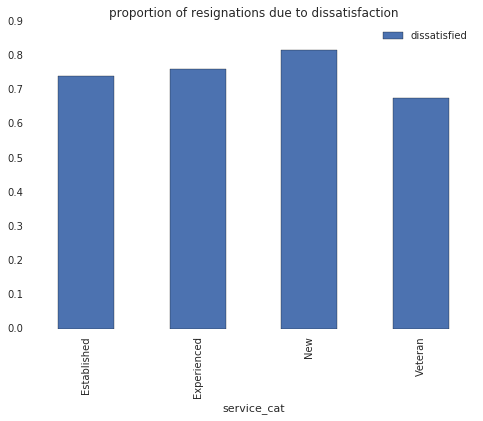

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
ax = pv.plot(kind='bar')
ax.set_title('proportion of resignations due to dissatisfaction')
for key, spine in ax.spines.items():
    spine.set_visible(False)

In [100]:
ax.set_title('proportion of resignations due to dissatisfaction')